In [ ]:
import re
import warnings 
import nltk
from nltk.tokenize import TweetTokenizer 
from nltk.stem.snowball import SnowballStemmer 
import pandas as pd
import nltk
from nltk.tokenize import TweetTokenizer 
from nltk.stem.snowball import SnowballStemmer

In [ ]:
%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
tweets_data = pd.read_csv("https://raw.githubusercontent.com/CankayaUniversity/ceng-407-408-2020-2021-Sentiment-Analysis-of-the-Feedback-form-Airplane-Passengers/main/Tweets.csv") 
 
tweets_data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
df=tweets_data.iloc[:,[10,1,12]]  

df.columns = ['text', 'sentiment','datetime'] 
data= df
data

,text,sentiment,datetime
0,@VirginAmerica What @dhepburn said.,neutral,2015-02-24 11:35:52 -0800
1,@VirginAmerica plus you've added commercials t...,positive,2015-02-24 11:15:59 -0800
2,@VirginAmerica I didn't today... Must mean I n...,neutral,2015-02-24 11:15:48 -0800
3,@VirginAmerica it's really aggressive to blast...,negative,2015-02-24 11:15:36 -0800
4,@VirginAmerica and it's a really big bad thing...,negative,2015-02-24 11:14:45 -0800
...,...,...,...
14635,@AmericanAir thank you we got on a different f...,positive,2015-02-22 12:01:01 -0800
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,2015-02-22 11:59:46 -0800
14637,@AmericanAir Please bring American Airlines to...,neutral,2015-02-22 11:59:15 -0800
14638,"@AmericanAir you have my money, you change my ...",negative,2015-02-22 11:59:02 -0800


In [ ]:
import nltk
nltk.download('punkt')
data['text']=data['text'].str.replace("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([0-9])","")
data['text']=data['text'].apply(nltk.word_tokenize)
data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,sentiment,datetime
0,"[What, said]",neutral,2015-02-24 11:35:52 -0800
1,"[plus, youve, added, commercials, to, the, exp...",positive,2015-02-24 11:15:59 -0800
2,"[I, didnt, today, Must, mean, I, need, to, tak...",neutral,2015-02-24 11:15:48 -0800
3,"[its, really, aggressive, to, blast, obnoxious...",negative,2015-02-24 11:15:36 -0800
4,"[and, its, a, really, big, bad, thing, about, it]",negative,2015-02-24 11:14:45 -0800
...,...,...,...
14635,"[thank, you, we, got, on, a, different, flight...",positive,2015-02-22 12:01:01 -0800
14636,"[leaving, over, minutes, Late, Flight, No, war...",negative,2015-02-22 11:59:46 -0800
14637,"[Please, bring, American, Airlines, to, BlackB...",neutral,2015-02-22 11:59:15 -0800
14638,"[you, have, my, money, you, change, my, flight...",negative,2015-02-22 11:59:02 -0800


In [ ]:
stemmer = SnowballStemmer('english')
data['text']=data['text'].apply(lambda x: [stemmer.stem(y) for y in x])
data

,text,sentiment,datetime
0,"[what, said]",neutral,2015-02-24 11:35:52 -0800
1,"[plus, youv, ad, commerci, to, the, experi, ta...",positive,2015-02-24 11:15:59 -0800
2,"[i, didnt, today, must, mean, i, need, to, tak...",neutral,2015-02-24 11:15:48 -0800
3,"[it, realli, aggress, to, blast, obnoxi, enter...",negative,2015-02-24 11:15:36 -0800
4,"[and, it, a, realli, big, bad, thing, about, it]",negative,2015-02-24 11:14:45 -0800
...,...,...,...
14635,"[thank, you, we, got, on, a, differ, flight, t...",positive,2015-02-22 12:01:01 -0800
14636,"[leav, over, minut, late, flight, no, warn, or...",negative,2015-02-22 11:59:46 -0800
14637,"[pleas, bring, american, airlin, to, blackberri]",neutral,2015-02-22 11:59:15 -0800
14638,"[you, have, my, money, you, chang, my, flight,...",negative,2015-02-22 11:59:02 -0800


In [ ]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
data['text']=data['text'].apply(lambda x: [y for y in x if y not in stopwords])
data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,sentiment,datetime
0,[said],neutral,2015-02-24 11:35:52 -0800
1,"[plus, youv, ad, commerci, experi, tacki]",positive,2015-02-24 11:15:59 -0800
2,"[didnt, today, must, mean, need, take, anoth, ...",neutral,2015-02-24 11:15:48 -0800
3,"[realli, aggress, blast, obnoxi, entertain, gu...",negative,2015-02-24 11:15:36 -0800
4,"[realli, big, bad, thing]",negative,2015-02-24 11:14:45 -0800
...,...,...,...
14635,"[thank, got, differ, flight, chicago]",positive,2015-02-22 12:01:01 -0800
14636,"[leav, minut, late, flight, warn, communic, mi...",negative,2015-02-22 11:59:46 -0800
14637,"[pleas, bring, american, airlin, blackberri]",neutral,2015-02-22 11:59:15 -0800
14638,"[money, chang, flight, dont, answer, phone, an...",negative,2015-02-22 11:59:02 -0800


In [ ]:
data['text'] = data['text'].str.join(" ")
data

,text,sentiment,datetime
0,said,neutral,2015-02-24 11:35:52 -0800
1,plus youv ad commerci experi tacki,positive,2015-02-24 11:15:59 -0800
2,didnt today must mean need take anoth trip,neutral,2015-02-24 11:15:48 -0800
3,realli aggress blast obnoxi entertain guest fa...,negative,2015-02-24 11:15:36 -0800
4,realli big bad thing,negative,2015-02-24 11:14:45 -0800
...,...,...,...
14635,thank got differ flight chicago,positive,2015-02-22 12:01:01 -0800
14636,leav minut late flight warn communic minut lat...,negative,2015-02-22 11:59:46 -0800
14637,pleas bring american airlin blackberri,neutral,2015-02-22 11:59:15 -0800
14638,money chang flight dont answer phone ani sugge...,negative,2015-02-22 11:59:02 -0800


In [ ]:
print ("data shape = ", data.shape)

data shape =  (14640, 3)


In [ ]:
sentiment = sorted(data['sentiment'].unique())
sentiment_mapping = dict(zip(sentiment, range(0, len(sentiment) + 1)))
data['sentiment']  = data['sentiment'].map(sentiment_mapping).astype(int)
data

,text,sentiment,datetime
0,said,1,2015-02-24 11:35:52 -0800
1,plus youv ad commerci experi tacki,2,2015-02-24 11:15:59 -0800
2,didnt today must mean need take anoth trip,1,2015-02-24 11:15:48 -0800
3,realli aggress blast obnoxi entertain guest fa...,0,2015-02-24 11:15:36 -0800
4,realli big bad thing,0,2015-02-24 11:14:45 -0800
...,...,...,...
14635,thank got differ flight chicago,2,2015-02-22 12:01:01 -0800
14636,leav minut late flight warn communic minut lat...,0,2015-02-22 11:59:46 -0800
14637,pleas bring american airlin blackberri,1,2015-02-22 11:59:15 -0800
14638,money chang flight dont answer phone ani sugge...,0,2015-02-22 11:59:02 -0800


In [ ]:
X = data['text']
y = data['sentiment']

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

In [ ]:
sentiment_objects = [TextBlob(tweets_data) for tweets_data in tweets_data['text']]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0, TextBlob("@VirginAmerica What @dhepburn said."))

In [ ]:
sentiment_values = [[tweets_data.sentiment.polarity, str(tweets_data)] for tweets_data in sentiment_objects]

sentiment_values[0]

[0.0, '@VirginAmerica What @dhepburn said.']

In [ ]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweets"])

sentiment_df.head()

,polarity,tweets
0,0.000000,@VirginAmerica What @dhepburn said.
1,0.000000,@VirginAmerica plus you've added commercials t...
2,-0.390625,@VirginAmerica I didn't today... Must mean I n...
3,0.006250,@VirginAmerica it's really aggressive to blast...
4,-0.350000,@VirginAmerica and it's a really big bad thing...


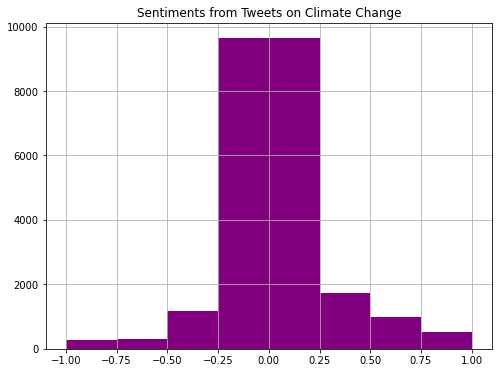

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [ ]:
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

sentiment_df.head()

,polarity,tweets
2,-0.390625,@VirginAmerica I didn't today... Must mean I n...
3,0.006250,@VirginAmerica it's really aggressive to blast...
4,-0.350000,@VirginAmerica and it's a really big bad thing...
5,-0.208333,@VirginAmerica seriously would pay $30 a fligh...
6,0.466667,"@VirginAmerica yes, nearly every time I fly VX..."


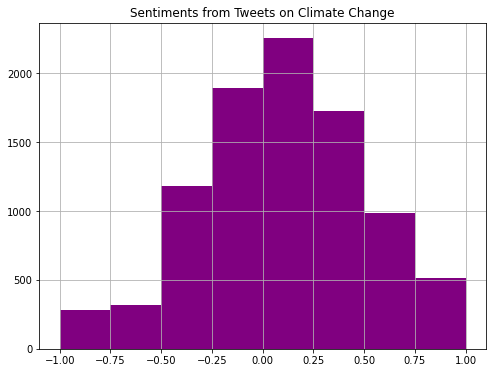

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [ ]:
import numpy as np
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
cntVectorizer = CountVectorizer(ngram_range=(1,2))

In [ ]:
VectorizedData = cntVectorizer.fit_transform(tweets_data.text)

IndexedData = hstack((np.array(range(0,VectorizedData.shape[0]))[:,None], VectorizedData))

In [ ]:
def sentiment(emotion):
    return {
        'negative': 0,
        'neutral': 1,
        'positive' : 2
    }[emotion]
    
targets = tweets_data.airline_sentiment.apply(sentiment)

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, targets_train, targets_test = train_test_split(IndexedData, targets, test_size=0.2, random_state=0)

data_train_index = data_train[:,0] 
data_train = data_train[:,1:] 
data_test_index = data_test[:,0]
data_test = data_test[:,1:] 

In [ ]:
from sklearn.svm import SVC  


model = SVC()  
model.fit(data_train, targets_train)
predictions = model.predict(data_test)

In [ ]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(targets_test, predictions)  
acc_score

0.7810792349726776

In [ ]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(svm.SVC())
 
clf_output = clf.fit(data_train, targets_train)

In [ ]:
clf.score(data_test, targets_test)

0.7872267759562842